# Projet 3 - Préparez des données pour un organisme de santé publique

# Contexte & Objectifs 
Déterminer les objectifs du nettoyage des données et de la démarche de mise en œuvre afin de construire un jeu de données adapté à une problématique métier. 


Effectuer des opérations de nettoyage sur des données structurées, notamment l’identification d’outliers et le remplissage de données manquantes, dans le respect des normes en vigueur (RGPD) afin de proposer des données exploitables pour une problématique métier.

corrélations


 Représenter des données grâce à des graphiques afin d’expliciter et justifier les analyses réalisées.


#### Installation des librairies

In [1]:
# # %pip install pandas numpy scikit-learn matplotlib seaborn*
# # %pip install skimpy
# # %pip install missingno
# # %pip install scipy
# %pip install feature-engine
# %pip install plotly

In [2]:
# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
from skimpy import skim
import missingno as msno
import matplotlib.pyplot as plt
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import MeanMedianImputer

%matplotlib inline

In [3]:
# Lecture du dataframe
df_origin = pd.read_csv('openfoodfacts_dataset.csv', sep='\t')

# Faire une copie du dataframe pour garder le dataframe original intact de toute modification
df = df_origin.copy()
df.head()

C:\Users\223115316\AppData\Local\Temp\ipykernel_30692\3293951688.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_origin = pd.read_csv('openfoodfacts_dataset.csv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Donne un aperçu des valeurs numeriques du df
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


Après visualisation une premiere visualisation du dataframe grace a .describe, il semble y avoir des valeurs manquantes.

Nous allons donc afficher la heatmap des valeurs manquantes pour verifier cette hypothèse

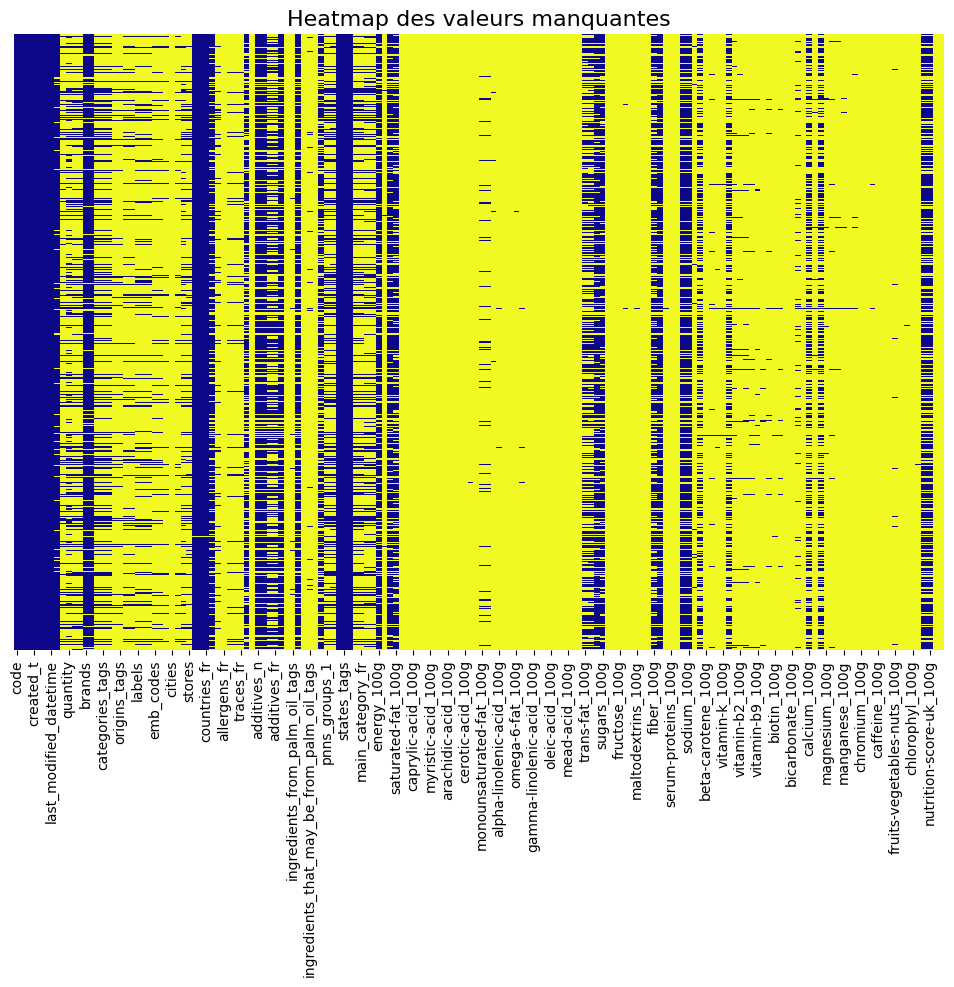

In [5]:
# Faire une Heatmap des valeurs manquantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.sample(10_000).isnull(), cmap='plasma', cbar=False, yticklabels=False)
plt.title('Heatmap des valeurs manquantes', fontsize=16)

plt.show()


Ou alors a plus petite echelle avec la distribution des nutrition grade

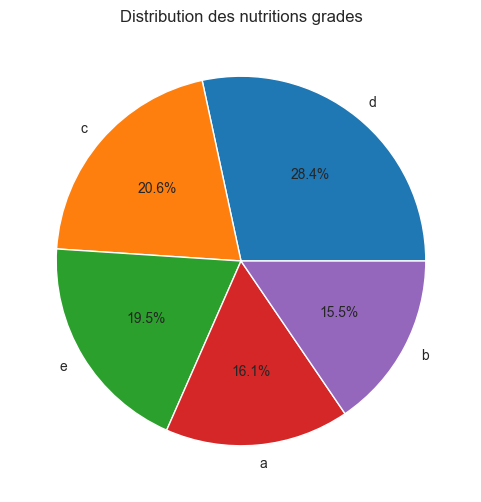

In [6]:
pie_chart_values = df['nutrition_grade_fr'].value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(pie_chart_values, labels=pie_chart_values.index, autopct='%1.1f%%')
plt.title('Distribution des nutritions grades')
plt.show()

Il y a en effet beaucoup de valeurs manquantes comme nous pouvons le voir grace a la présence de la couleur jaune dans la  heatmap, nous allons donc proceder a un premier filtre du dataframe, c'est a dire supprimer les colonnes qui ont plus que 50% de valeurs manquantes. 

Pourquoi 50% ? Pour plusieurs facteur differents :

- La Pertinence des données
- Possibilité d’avoir des informations significatives.
- Plus de possibilités pour remplir ou imputer les données ("Meilleur imputation")
- Permet de conserver des variables potentiellement importantes.
- Équilibre entre nettoyage et conservation des données.
- Offre une plus grande flexibilité pour diverses méthodes d'analyse.




In [7]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percent = df.isnull().mean() * 100
X = 50

# Filtrer les colonnes qui ont plus de X% de valeurs manquantes
cols_with_many_missing = missing_percent[missing_percent > X].index

# Afficher les colonnes concernées
print(f"Colonnes avec plus de {X}% de valeurs manquantes : {len(cols_with_many_missing)}")

df = df.drop(columns=cols_with_many_missing)

# Afficher les colonnes concernées
print(f"Colonnes restante: {168 - len(cols_with_many_missing)}")

Colonnes avec plus de 50% de valeurs manquantes : 128
Colonnes restante: 40


<Axes: >

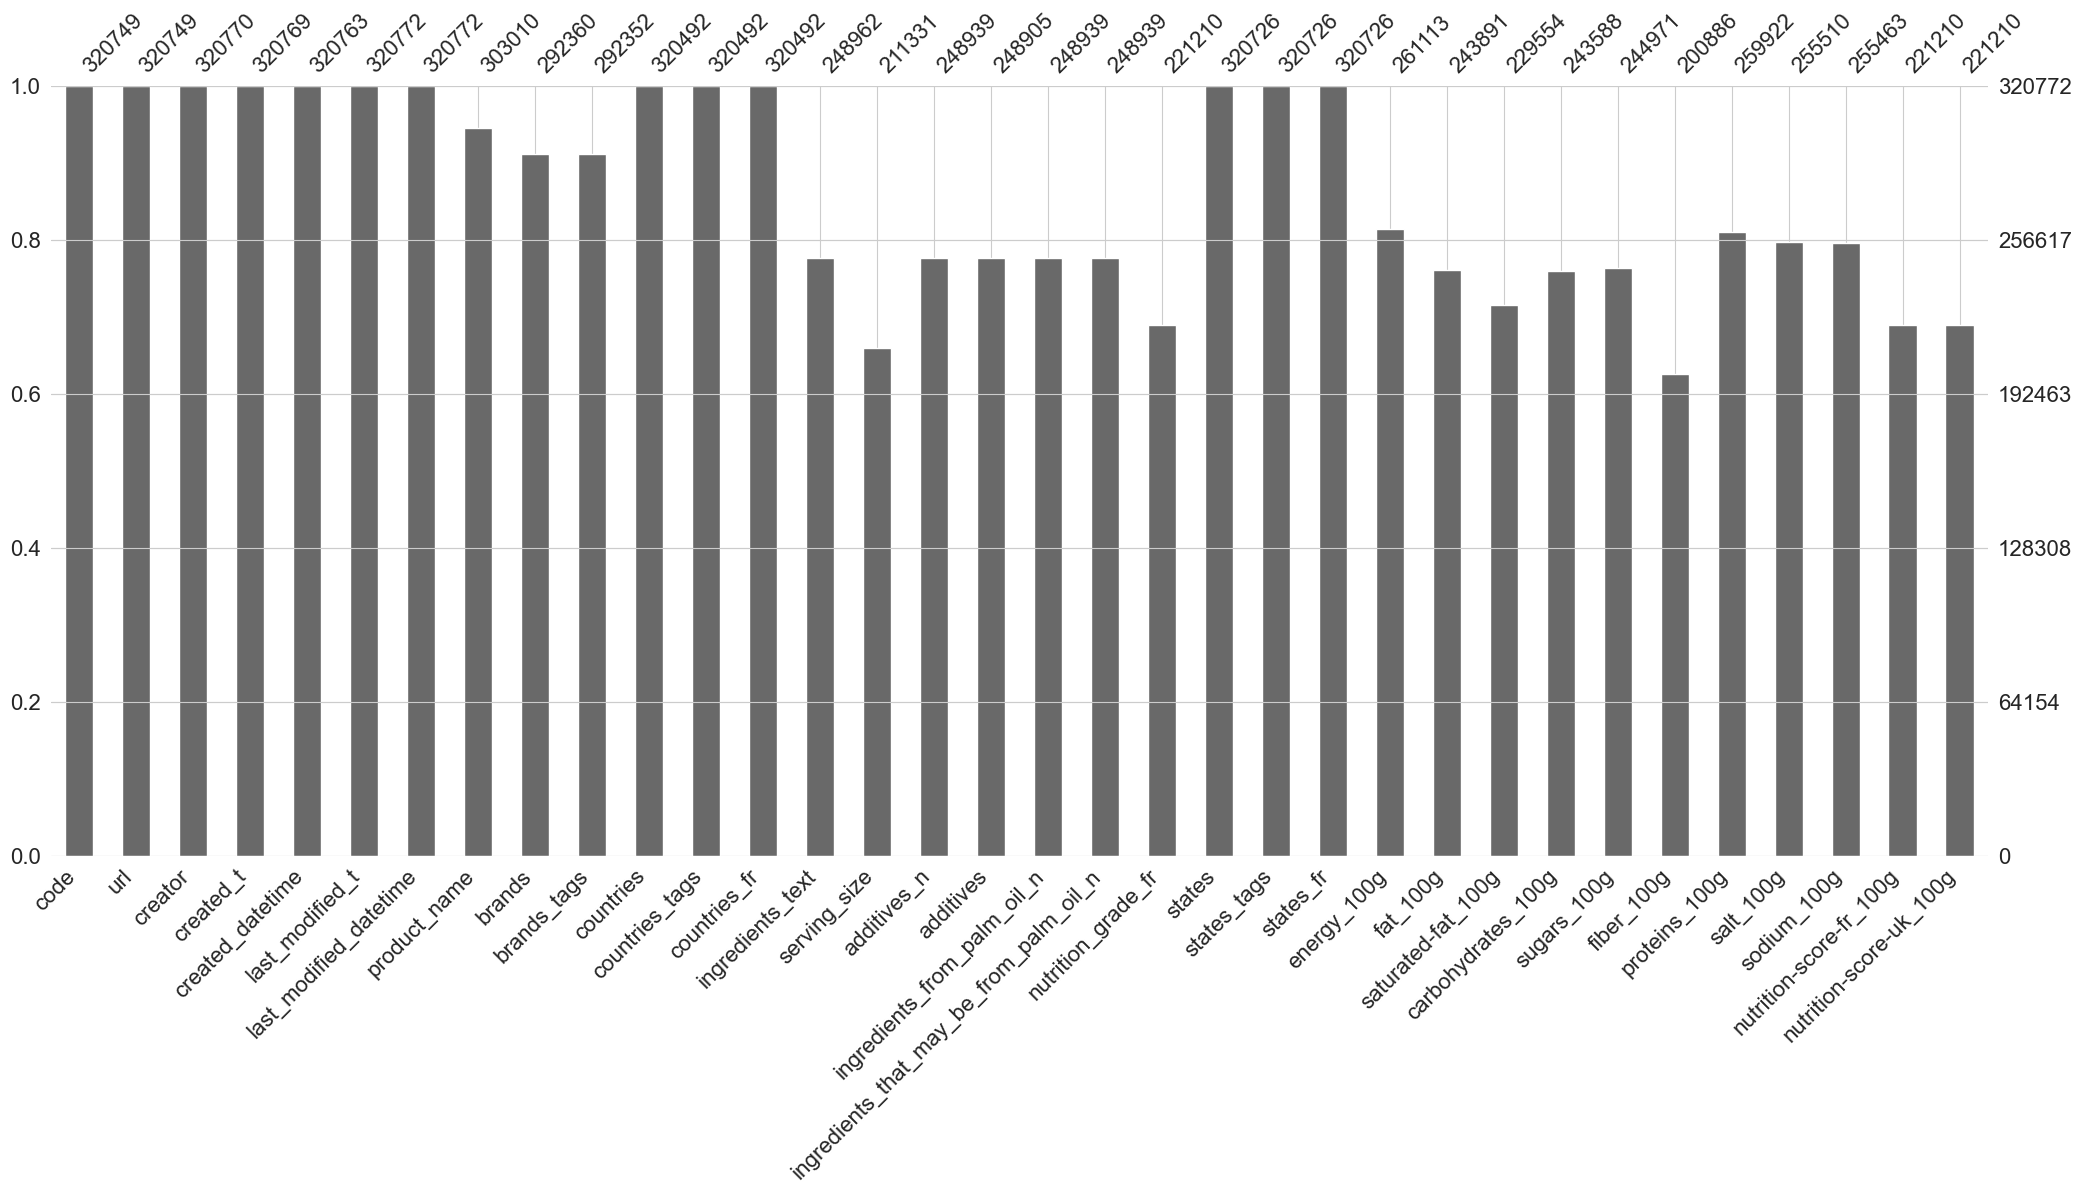

In [8]:
# Verification des valeurs manquantes après supression des colonnes vides
msno.bar(df)

Nous avons constaté qu'il y avait plus de 120 colonnes présentant plus de 50 % de valeurs manquantes. En les supprimant, nous effectuons ainsi une première sélection des données, en ne conservant que les colonnes les plus pertinentes.

Maintenant que nous avons supprimer les colonnes contenant le moins d'information, il serait pertinent de verifier si elle sont de qualité, en verifiants plusieurs point:
- Si il y a des valeurs aberantes

- Si il y a des doublons dans les colonnes et dans les lignes

- Si les unité de mesures sont correcte

Commençon par ce a quoi elle corresponde: 

# Que représente les colonnes ?

## 🌍 Information générale
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **code**               | Le code unique du produit dans la base de données.                                                   |
| **url**                | L'URL du produit sur le site OpenFoodFacts.                                                          |
| **creator**            | L'identifiant ou le nom de la personne qui a créé l'entrée du produit.                               |
| **created_t**          | L'horodatage de création de l'entrée du produit.                                                     |
| **created_datetime**   | La date et l'heure de création de l'entrée du produit.                                               |
| **last_modified_t**    | L'horodatage de la dernière modification apportée à l'entrée du produit.                             |
| **last_modified_datetime** | La date et l'heure de la dernière modification apportée à l'entrée du produit.                     |

## 🏷 Marque et Pays
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **product_name**       | Le nom du produit tel qu'il est indiqué sur l'emballage ou dans la base de données.                  |
| **brands**             | La ou les marques associées au produit.                                                              |
| **brands_tags**        | Les mots-clés ou tags liés à la marque, pour faciliter la recherche et le filtrage.                  |
| **countries**          | Les pays dans lesquels le produit est disponible ou commercialisé.                                   |
| **countries_tags**     | Les mots-clés ou tags associés aux pays du produit.                                                  |
| **countries_fr**       | La version française des pays associés au produit.                                                   |

## 🍽 Ingrédients et Additifs
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **ingredients_text**   | La liste des ingrédients présents dans le produit, souvent directement copiée de l'étiquette.        |
| **serving_size**       | La taille de la portion recommandée pour le produit.                                                 |
| **additives**          | La liste des additifs alimentaires présents dans le produit.                                         |
| **additives_n**        | Le nombre total d'additifs alimentaires présents dans le produit.                                   |
| **ingredients_from_palm_oil_n** | Le nombre d'ingrédients dans le produit qui proviennent d'huile de palme.                     |
| **ingredients_that_may_be_from_palm_oil_n** | Indique si certains ingrédients peuvent provenir d'huile de palme.                 |

## 🍏 Valeurs nutritionnelles
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **energy_100g**        | L'énergie (en kilojoules) contenue dans 100 grammes du produit.                                      |
| **fat_100g**           | La quantité de graisses (en grammes) contenue dans 100 grammes du produit.                          |
| **saturated-fat_100g** | La quantité de graisses saturées (en grammes) contenue dans 100 grammes du produit.                 |
| **carbohydrates_100g** | La quantité de glucides (en grammes) contenue dans 100 grammes du produit.                          |
| **sugars_100g**        | La quantité de sucres (en grammes) contenue dans 100 grammes du produit.                            |
| **fiber_100g**         | La quantité de fibres alimentaires (en grammes) contenue dans 100 grammes du produit.               |
| **proteins_100g**      | La quantité de protéines (en grammes) contenue dans 100 grammes du produit.                         |
| **salt_100g**          | La quantité de sel (en grammes) contenue dans 100 grammes du produit.                               |
| **sodium_100g**        | La quantité de sodium (en grammes) contenue dans 100 grammes du produit.                            |
| **energy_kcal**        | L'énergie (en kilocalories) contenue dans 100 grammes du produit.                                   |

## 🏅 Scores et Étiquettes
| Variable               | Description                                                                                          |
|------------------------|------------------------------------------------------------------------------------------------------|
| **nutrition_grade_fr** | La note nutritionnelle du produit, souvent exprimée sous forme de lettre, en français.               |
| **nutrition-score-fr_100g** | Le score nutritionnel du produit pour le marché français, basé sur des critères de santé.           |
| **nutrition-score-uk_100g** | Le score nutritionnel du produit pour le marché britannique, basé sur des critères de santé.        |
| **states**             | Les états ou conditions sous lesquels le produit est vendu (par exemple, bio, sans gluten).           |
| **states_tags**        | Les mots-clés ou tags associés aux états du produit.                                                 |
| **states_fr**          | La version française des états associés au produit.                                                  |

# Analyse uni/multi varié des colonnes *_100g

In [9]:
# Récuperer les colonnes de valeurs nutritionnelles (vn)
df_vn = df.filter(like='_100g')

In [10]:
df_vn.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,2.611130e+05,243891.000000,229554.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,221210.000000,221210.000000
mean,1.141915e+03,12.730379,5.129932,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,9.165535,9.058049
std,6.447154e+03,17.578747,8.014238,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,9.055903,9.183589
min,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000,-15.000000
25%,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000,1.000000
50%,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,10.000000,9.000000
75%,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,16.000000,16.000000
max,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000,40.000000


Verifions si les données indiqué par le .describe sont coherante en nous basant sur les données de l'[European Food Safety Authority (EFSA)](https://www.efsa.europa.eu/en)

| **Colonne**                           | **Moyenne Observée** | **Unité**      | **Valeur Moyenne Tolérée** |
|---------------------------------------|----------------------|----------------|----------------------------|
| energy_100g                           | 1141,92              | kJ             | 800 à 2500                 |
| energy_100g                           | 272,92               | kcal           | 200 à 600                  |
| fat_100g                              | 12,73                | g              | 0 à 20                     |
| saturated-fat_100g                    | 5,13                 | g              | 0 à 10                     |
| carbohydrates_100g                    | 32,07                | g              | 10 à 60                    |
| sugars_100g                           | 16,00                | g              | 0 à 30                     |
| fiber_100g                            | 2,86                 | g              | 2 à 10                     |
| proteins_100g                         | 7,08                 | g              | 5 à 25                     |
| salt_100g                             | 2,03                 | g              | 0 à 5                      |
| sodium_100g                           | 0,80                 | g              | 0 à 2                      |
| nutrition-score-fr_100g               | 9,17                 | score          | -15 à 40                   |
| nutrition-score-uk_100g               | 9,06                 | score          | -15 à 40                   |


Les valeurs moyennes sont coherante par rapport au valeur tolere en UE, cepeandant pour s'assurer que les données sont coherante nous allont tracer leur diqtibution grace a un diagramme boite a moustache 

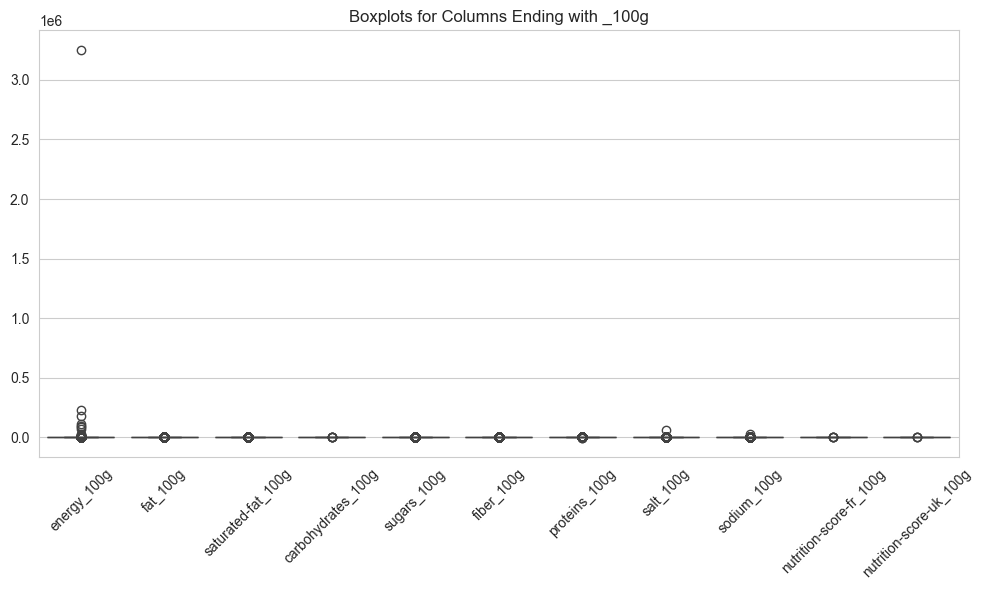

In [11]:
# Creation d'un boxplot pour chaque collone de valeur nutritionnel
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_vn)
plt.title('Boxplots for Columns Ending with _100g')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show() 


Nous pouvons constater que la colonne energy est encline au valeur aberantes de facon extreme,pour ne pas fausser notre analyse, on passe en echelle logarithmique pour avoir une meilleur visibilité generale et on isole la colonne energy

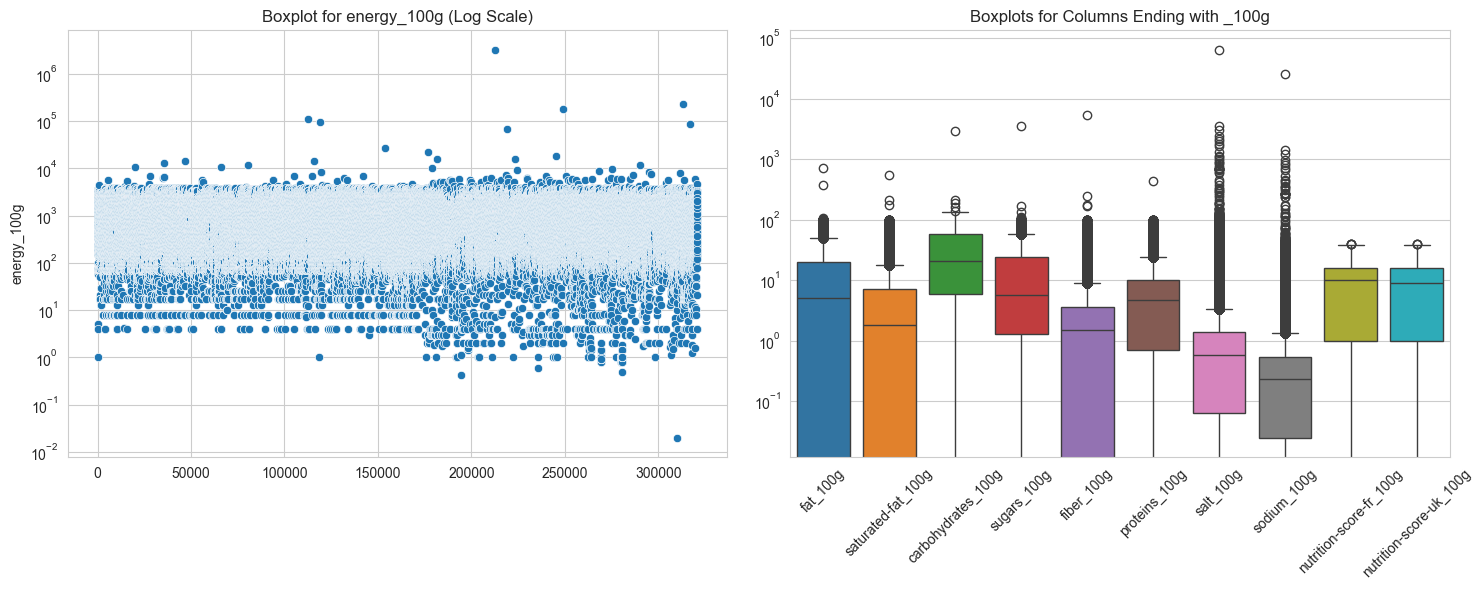

In [12]:
# suppression de la col energy_100g pour affichage
if 'energy_100g' in df.columns:
    df_to_plot = df_vn.drop('energy_100g', axis=1)

# Récupérer les colonnes qui se terminent par '_100g' dans un dataframe
data_to_plot = df_to_plot.filter(like='_100g')

# Création des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Premier graphique
sns.scatterplot(data=df_vn['energy_100g'], ax=axes[0])
axes[0].set_title('Boxplot for energy_100g (Log Scale)')
axes[0].set_yscale('log')  # Appliquer l'échelle logarithmique sur l'axe y



# Deuxième graphique
sns.boxplot(data=data_to_plot, ax=axes[1])
axes[1].set_title('Boxplots for Columns Ending with _100g')
axes[1].tick_params(axis='x', rotation=45) 

# Ajuster la mise en page
plt.tight_layout()  
plt.yscale('log')

# Afficher le graphique
plt.show()

Nous voyons ici des outliers or  nous savons que pour 1 produit il est impossible que sa valeur nutritionnel soit proche de 100 ou la depasse et pareil si < 0, nous somme donc sujet ici a des valeurs aberantes et non a des valeurs atypique.

Nous devons donc les identifiés, pour ce faire je vais utilisé la methode du zscore

Avant toute chose nous pouvons voir que la colonne energy a des valeurs très haute avec une moyenne de 1100 et après verification il semblerai qu'elle soit exprimer en kj et non en gramme

La colonne nutrition score uk semble etre un doublon de la colonne nutriscore fr, pour cette analyse j'ai donc decidé de la retirer

In [13]:
# Renommer la colonne dans le df et supprimer la colonne dans df_vn
df.rename(columns={'energy_100g':'energy_kj'}, inplace=True)
df_vn.drop(columns=['energy_100g', 'nutrition-score-uk_100g'], axis=1, inplace=True)

# Supprime toutes les valeurs > 100g et < 0 
df_vn = df_vn.applymap(lambda x: np.nan if x > 100 or x < 0 else x)
df_vn.describe()

C:\Users\223115316\AppData\Local\Temp\ipykernel_30692\795290197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vn.drop(columns=['energy_100g', 'nutrition-score-uk_100g'], axis=1, inplace=True)
C:\Users\223115316\AppData\Local\Temp\ipykernel_30692\795290197.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_vn = df_vn.applymap(lambda x: np.nan if x > 100 or x < 0 else x)


,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,243887.000000,229551.000000,243569.000000,244952.000000,200881.000000,259918.000000,255352.000000,255429.000000,185504.000000
mean,12.725256,5.125925,32.055323,15.985449,2.832473,7.079409,1.588497,0.647145,11.587324
std,17.503695,7.913684,29.140680,21.165362,4.588272,8.156552,6.242531,2.656343,7.783573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,4.000000
50%,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.580000,0.229000,12.000000
75%,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.371600,0.541000,18.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000


## Identification des outliers avec l' IQR

L'IQR (Intervalle Interquartile) est une mesure de la dispersion qui représente la différence entre le premier quartile (Q1) et le troisième quartile (Q3) d'un ensemble de données, permettant d'identifier les valeurs aberrantes situées en dehors de 1,5 fois l'IQR au-dessus de Q3 ou en dessous de Q1.

In [14]:
df_vn_iqr = df_vn.copy()

# Vérifier si les colonnes sont bien numériques
df_vn_iqr = df_vn_iqr.apply(pd.to_numeric, errors='coerce')

# Calculer les quartiles
Q1 = df_vn_iqr.quantile(0.25)
Q3 = df_vn_iqr.quantile(0.75)

# Calculer l'IQR
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remplacer les valeurs par NaN si elles sont en dehors des limites
df_vn_iqr[(df_vn_iqr < lower_bound) | (df_vn_iqr > upper_bound)] = np.NaN

# Vérifier le résultat
df_vn_iqr.describe()


,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,235491.000000,212307.000000,243569.000000,229656.000000,186758.000000,247329.000000,239019.000000,238977.000000,185500.000000
mean,10.489088,3.502599,32.055323,12.130217,1.914766,5.887682,0.718245,0.282850,11.586712
std,12.693443,4.548423,29.140680,15.161924,2.213757,5.998737,0.774157,0.304824,7.782539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,1.070000,0.000000,0.500000,0.048260,0.019000,4.000000
50%,4.350000,1.400000,20.600000,4.800000,1.200000,4.230000,0.475000,0.188000,12.000000
75%,18.000000,5.700000,58.330000,18.400000,3.300000,9.000000,1.186180,0.467000,18.000000
max,50.000000,17.840000,100.000000,58.000000,9.000000,23.940000,3.332480,1.315000,38.000000


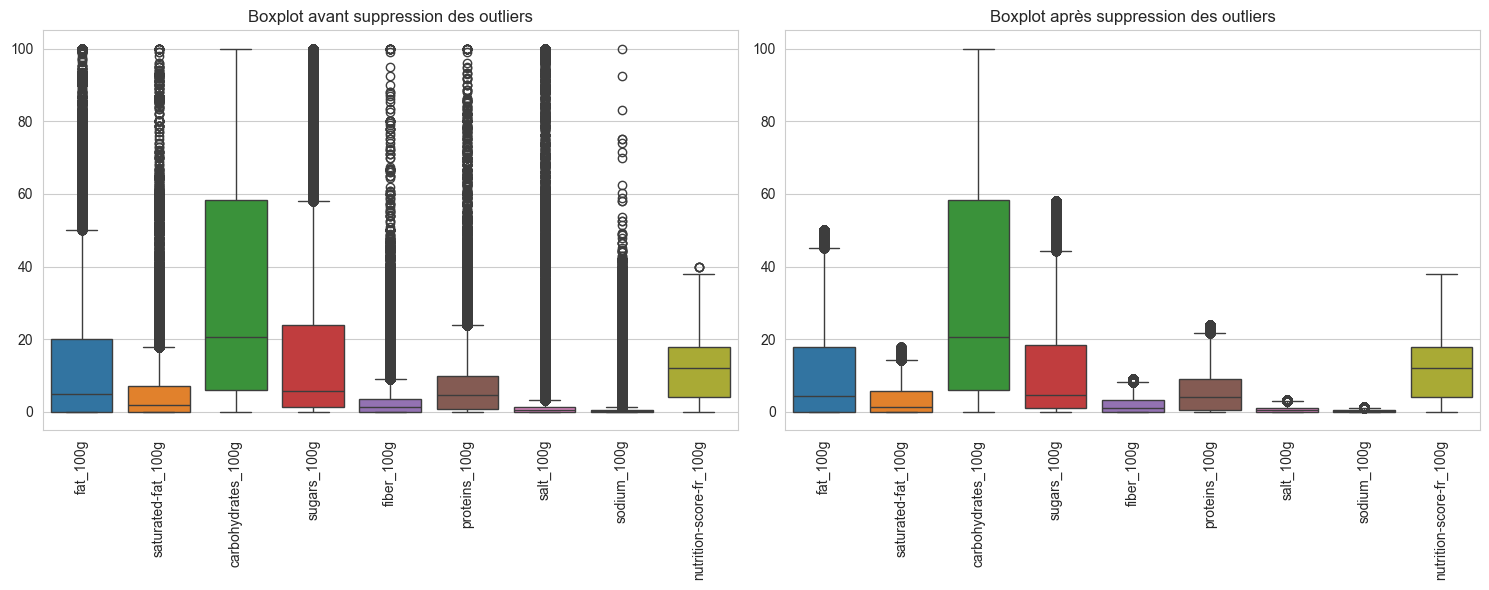

In [15]:
# Créer un subplot avec 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  

sns.boxplot(data=df_vn, ax=axs[0])
axs[0].set_title("Boxplot avant suppression des outliers")
axs[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=df_vn_iqr, ax=axs[1])  # Utilisez axs[1] pour le deuxième subplot
axs[1].set_title("Boxplot après suppression des outliers")
axs[1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()


Sans oublier de traiter aussi energy

In [16]:
print(df['energy_kj'].describe())

# Sauvegarde de l'original pour le plot final

original_energy_col = df['energy_kj'].copy()

# Calculer les quartiles
Q1 = df['energy_kj'].quantile(0.25)
Q3 = df['energy_kj'].quantile(0.75)

# Calculer l'IQR
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


count    2.611130e+05
mean     1.141915e+03
std      6.447154e+03
min      0.000000e+00
25%      3.770000e+02
50%      1.100000e+03
75%      1.674000e+03
max      3.251373e+06
Name: energy_kj, dtype: float64


In [17]:
# Remplacer les valeurs par NaN si elles sont en dehors des limites
df['energy_kj'] = df['energy_kj'].where((df['energy_kj'] >= lower_bound) & (df['energy_kj'] <= upper_bound), np.nan)

print(df['energy_kj'].describe())

count    260033.000000
mean       1114.353744
std         781.782167
min           0.000000
25%         372.000000
50%        1094.000000
75%        1674.000000
max        3619.000000
Name: energy_kj, dtype: float64


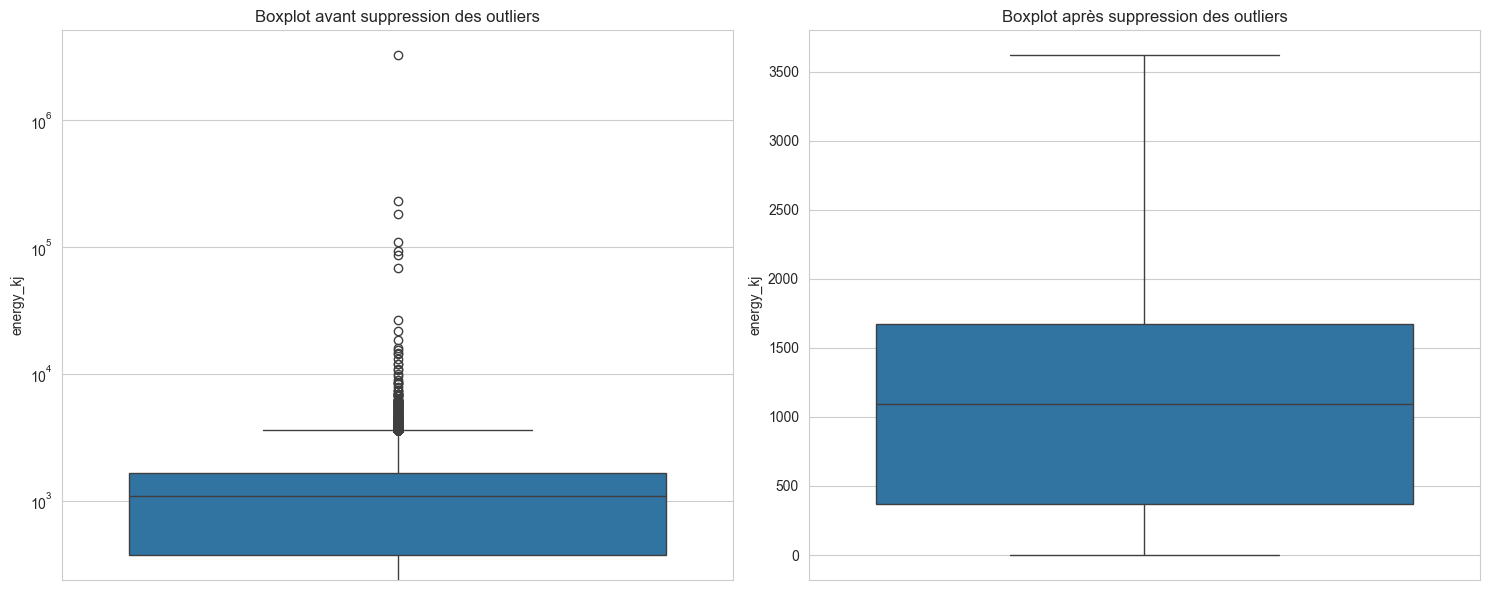

In [18]:
# Créer un subplot avec 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  
sns.boxplot(data=original_energy_col, ax=axs[0])
axs[0].set_title("Boxplot avant suppression des outliers")
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_yscale('log')

sns.boxplot(data=df['energy_kj'], ax=axs[1])  # Utilisez axs[1] pour le deuxième subplot
axs[1].set_title("Boxplot après suppression des outliers")
axs[1].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()


Maintenant que nous avons fait un premier traitement sur les valeurs aberantes nous pouvons passer a la gestion des valeurs manquantes et des doublons

In [19]:
# Identifiez les colonnes communes entre df et df_vn
colonnes_communes = df.columns.intersection(df_vn_iqr.columns)

# Remplacez les colonnes de df par celles de df_vn
df[colonnes_communes] = df_vn[colonnes_communes]

In [20]:
# Supression des doublons dans les dataframes
df = df.drop_duplicates()

Pour traiter les valeurs manquantes il faut deja dans un premier temps séparer toutesles colonnes cat et num pour pouvoir les traiter chacune independament

Colonnes numeriques

Pour remplacer les valeurs manquantes plusieurs options s'offre à nous:

- remplacer par 0:
Simple et rapide, utile si 0 a un sens contextuel, mais peut biaiser les résultats si mal appliqué.


- remplacer par la moyenne :
Préserve la tendance centrale, mais peut réduire la variance et fausser les relations si les données manquantes ne sont pas aléatoires.

- remplacer grace au ML (KNN imputer/ Iterative Imputer):
Imputation précise et efficace pour des relations complexes, mais coûteuse en calcul et sensible aux valeurs aberrantes.

In [21]:
# Lister les colonnes numerique
numerical_columns = list(df.select_dtypes(include="number").columns)

# Verification de la présence des valeurs manquantes
print(df[numerical_columns].isna().sum())

df[numerical_columns].describe()

additives_n                                 71832
ingredients_from_palm_oil_n                 71832
ingredients_that_may_be_from_palm_oil_n     71832
energy_kj                                   60738
fat_100g                                    76884
saturated-fat_100g                          91220
carbohydrates_100g                          77202
sugars_100g                                 75819
fiber_100g                                 119890
proteins_100g                               60853
salt_100g                                   65419
sodium_100g                                 65342
nutrition-score-fr_100g                    135267
nutrition-score-uk_100g                     99561
dtype: int64


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_kj,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,248939.000000,248939.000000,260033.000000,243887.000000,229551.000000,243569.000000,244952.000000,200881.000000,259918.000000,255352.000000,255429.000000,185504.000000,221210.000000
mean,1.936024,0.019659,0.055246,1114.353744,12.725256,5.125925,32.055323,15.985449,2.832473,7.079409,1.588497,0.647145,11.587324,9.058049
std,2.502019,0.140524,0.269207,781.782167,17.503695,7.913684,29.140680,21.165362,4.588272,8.156552,6.242531,2.656343,7.783573,9.183589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,4.000000,1.000000
50%,1.000000,0.000000,0.000000,1094.000000,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.580000,0.229000,12.000000,9.000000
75%,3.000000,0.000000,0.000000,1674.000000,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.371600,0.541000,18.000000,16.000000
max,31.000000,2.000000,6.000000,3619.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,40.000000


In [22]:
# Nécessaire pour activer IterativeImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
# Création de l'imputer KNN
imputer = IterativeImputer()

# Appliquer l'imputer sur les colonnes concernées
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])


print(df[numerical_columns].isna().sum())
df[numerical_columns].describe()

c:\Users\223115316\Documents\GitHub\p3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


additives_n                                0
ingredients_from_palm_oil_n                0
ingredients_that_may_be_from_palm_oil_n    0
energy_kj                                  0
fat_100g                                   0
saturated-fat_100g                         0
carbohydrates_100g                         0
sugars_100g                                0
fiber_100g                                 0
proteins_100g                              0
salt_100g                                  0
sodium_100g                                0
nutrition-score-fr_100g                    0
nutrition-score-uk_100g                    0
dtype: int64


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_kj,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000
mean,1.929113,0.019667,0.055178,1122.831030,12.760061,4.758587,31.793725,15.290128,2.531003,7.090258,1.644819,0.647566,9.191705,8.937896
std,2.220602,0.123926,0.237303,717.066849,15.748787,6.817248,26.063574,18.951994,3.801636,7.360366,6.020910,2.370429,7.765285,8.039612
min,-12.259566,-0.090363,-0.323903,0.000000,-33.446849,-14.794699,-211.355765,-58.637687,-14.895345,-74.096754,0.000000,-0.000002,-46.257172,-50.409641
25%,0.000000,0.000000,0.000000,498.000000,0.500000,0.200000,8.900000,2.080000,0.000000,1.600000,0.120000,0.047244,3.000000,2.330489
50%,1.929113,0.000000,0.000000,1122.831030,10.710000,3.200000,30.155985,10.500000,2.184589,6.700000,0.952500,0.375000,9.191705,8.937896
75%,2.252081,0.000000,0.025467,1569.000000,16.463299,5.177663,50.770000,16.670000,3.044474,8.330000,1.644819,0.647566,14.000000,14.000000
max,31.000000,2.000000,6.000000,6099.775904,151.084970,100.000000,146.915135,100.000000,100.000000,100.000000,254.000818,100.000000,73.429625,76.583562


Colonnes Categoriel

In [23]:
# Lister les colonnes categoriels
categorical_columns = list(df.select_dtypes(include="object").columns)

# Verification de la présence des valeurs manquantes
print(df[categorical_columns].isna().sum())

df[categorical_columns].describe()

code                          22
url                           22
creator                        2
created_t                      3
created_datetime               9
last_modified_t                0
last_modified_datetime         0
product_name               17762
brands                     28411
brands_tags                28419
countries                    280
countries_tags               280
countries_fr                 280
ingredients_text           71810
serving_size              109441
additives                  71866
nutrition_grade_fr         99561
states                        45
states_tags                   45
states_fr                     45
dtype: int64


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives,nutrition_grade_fr,states,states_tags,states_fr
count,320749,320749,320769,320768,320762,320771,320771,303009,292360,292352,320491,320491,320491,248961,211330,248905,221210,320726,320726,320726
unique,320638,320749,3535,189636,189568,180639,180495,221347,58784,50253,1434,725,722,205520,25423,196069,5,1021,1021,1021
top,24463061071,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489077120,2017-03-09T10:37:09Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Carrefour,carrefour,US,en:united-states,États-Unis,"Carbonated water, natural flavor.",240 ml (8 fl oz),[ extra-virgin-olive-oil -> en:extra-virgin-o...,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
freq,2,1,169868,20,20,33,33,410,2978,3149,169928,172998,172998,222,5496,397,62763,168905,168905,168905


In [24]:
#Remplacement des valeurs manquantes par 'inconnu' pour ne pas biaser le dataset
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Verification de la présence des valeurs manquantes
print(df[categorical_columns].isna().sum())

df[categorical_columns].describe()

code                      0
url                       0
creator                   0
created_t                 0
created_datetime          0
last_modified_t           0
last_modified_datetime    0
product_name              0
brands                    0
brands_tags               0
countries                 0
countries_tags            0
countries_fr              0
ingredients_text          0
serving_size              0
additives                 0
nutrition_grade_fr        0
states                    0
states_tags               0
states_fr                 0
dtype: int64


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives,nutrition_grade_fr,states,states_tags,states_fr
count,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771,320771
unique,320639,320750,3536,189637,189569,180639,180495,221348,58785,50254,1435,726,723,205521,25424,196070,6,1022,1022,1022
top,Unknown,Unknown,usda-ndb-import,1489055829,2017-03-09T16:32:00Z,1439141742,2015-08-09T17:35:42Z,Unknown,Unknown,Unknown,US,en:united-states,États-Unis,Unknown,Unknown,Unknown,Unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
freq,22,22,169868,20,20,33,33,17762,28411,28419,169928,172998,172998,71810,109441,71866,99561,168905,168905,168905


<Axes: >

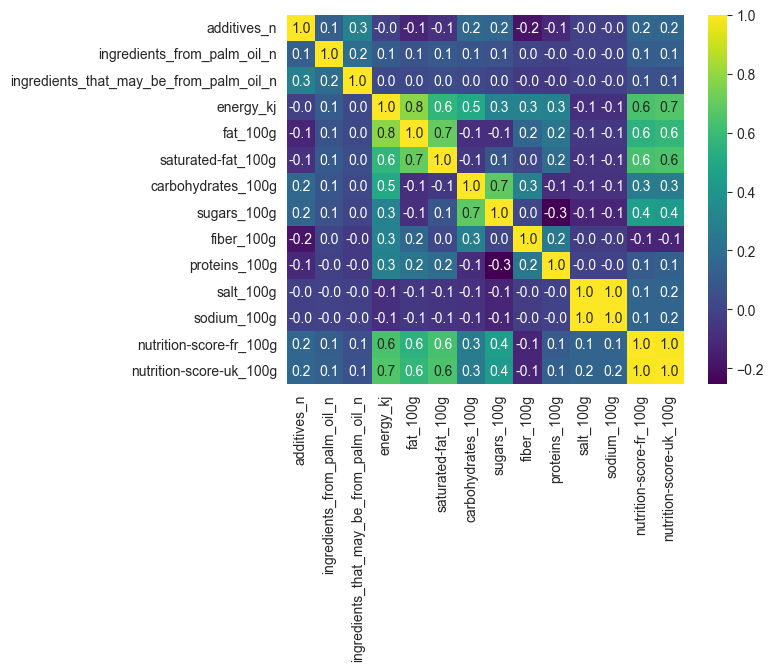

In [39]:
some_array = df[numerical_columns].corr()
sns.heatmap(some_array, cmap='viridis', annot=True, fmt=".1f")

Maintenant que nos données sont clear nous pouvons les analyses plus facilement par exemple en faisant le cercle de corelation

In [26]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_kj,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000,320771.000000
mean,1.929113,0.019667,0.055178,1122.831030,12.760061,4.758587,31.793725,15.290128,2.531003,7.090258,1.644819,0.647566,9.191705,8.937896
std,2.220602,0.123926,0.237303,717.066849,15.748787,6.817248,26.063574,18.951994,3.801636,7.360366,6.020910,2.370429,7.765285,8.039612
min,-12.259566,-0.090363,-0.323903,0.000000,-33.446849,-14.794699,-211.355765,-58.637687,-14.895345,-74.096754,0.000000,-0.000002,-46.257172,-50.409641
25%,0.000000,0.000000,0.000000,498.000000,0.500000,0.200000,8.900000,2.080000,0.000000,1.600000,0.120000,0.047244,3.000000,2.330489
50%,1.929113,0.000000,0.000000,1122.831030,10.710000,3.200000,30.155985,10.500000,2.184589,6.700000,0.952500,0.375000,9.191705,8.937896
75%,2.252081,0.000000,0.025467,1569.000000,16.463299,5.177663,50.770000,16.670000,3.044474,8.330000,1.644819,0.647566,14.000000,14.000000
max,31.000000,2.000000,6.000000,6099.775904,151.084970,100.000000,146.915135,100.000000,100.000000,100.000000,254.000818,100.000000,73.429625,76.583562


Index(['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')


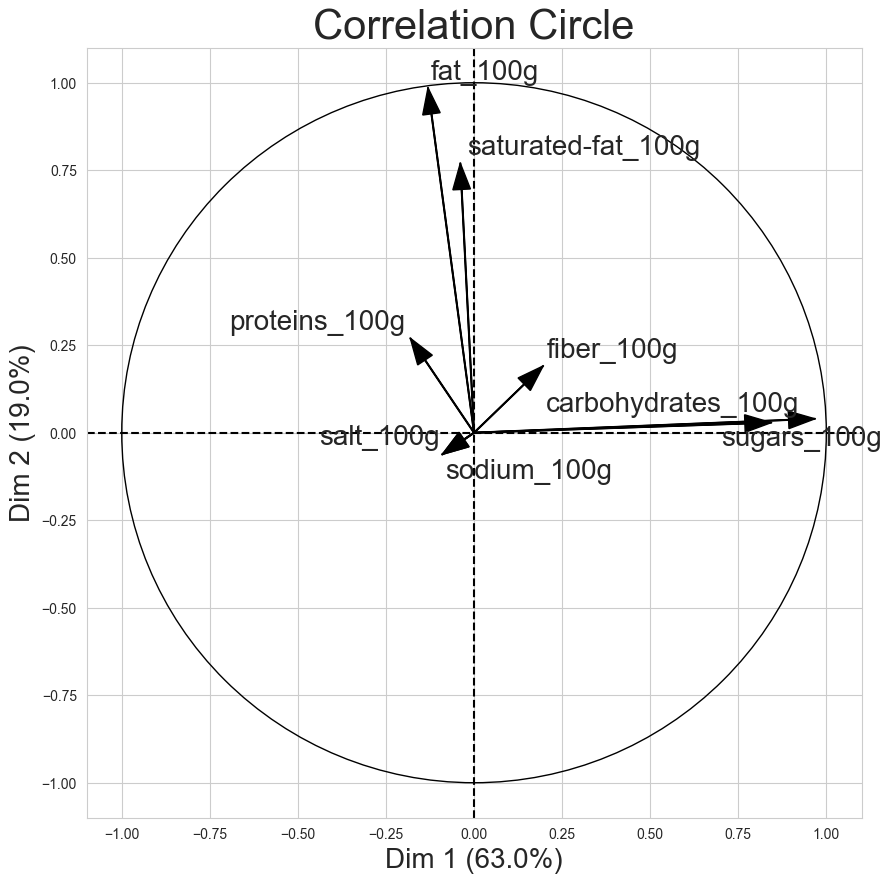

In [27]:
from mlxtend.data import iris_data
from mlxtend.plotting import plot_pca_correlation_graph
import numpy as np

pca_cols = ['fat_100g','saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g']

df_numeric = df[pca_cols]
print(df_numeric.columns)


figure, correlation_matrix = plot_pca_correlation_graph(df_numeric.sample(100_00),                                                         
                                                        pca_cols,
                                                        dimensions=(1,2),
                                                        figure_axis_size=10)

In [28]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Automatisation des traitements avec des fonctions

# Justification de l'Absence de Lien avec le RGPD dans Votre Projet
Après analyse de votre projet de nettoyage de données pour un organisme de santé publique, il apparaît que les opérations effectuées n'impliquent pas de traitement de données personnelles soumises au RGPD. Voici les raisons justifiant cette affirmation :

Nature des Données Traitées

Le dataset utilisé (openfoodfacts_dataset.csv) semble contenir des informations sur des produits alimentaires, telles que des valeurs nutritionnelles, des marques, des pays, etc. Ces données sont généralement anonymisées et ne permettent pas d'identifier directement ou indirectement des individus.
Absence de Données Personnelles

Les données manipulées ne contiennent pas d'informations personnelles telles que des noms, adresses, numéros de téléphone, identifiants uniques liés à des individus, ou toute autre information permettant d'identifier une personne physique.
Finalité du Traitement

L'objectif principal est de nettoyer et préparer des données structurées pour des analyses statistiques et des problématiques métier liées à la santé publique. Ce traitement est orienté vers l'amélioration des données au niveau agrégé plutôt que vers la gestion de données personnelles.
Conformité aux Principes du RGPD

Bien que le RGPD ne soit pas directement applicable, les bonnes pratiques de gestion des données, telles que la minimisation des données et la sécurisation des informations, sont respectées dans votre démarche de nettoyage.
Absence de Consentement et de Base Légale Nécessaire

Étant donné que les données ne concernent pas des personnes physiques, les notions de consentement et de base légale pour le traitement des données personnelles ne s'appliquent pas.

Statistique F: 28023.35475149996
P-valeur: 0.0
Il y a une différence significative entre les groupes.


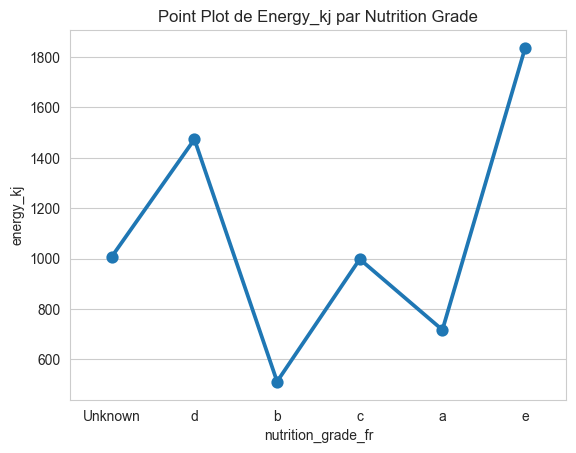

In [29]:
from scipy import stats

# Étape 1 : Vérifier les groupes de données
groups = df.groupby('nutrition_grade_fr')['energy_kj'].apply(list)

# Étape 2 : Effectuer l'ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Étape 3 : Afficher les résultats de l'ANOVA
print(f"Statistique F: {f_stat}")
print(f"P-valeur: {p_value}")

# Étape 4 : Interpréter les résultats
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Il y a une différence significative entre les groupes.")
else:
    print("Il n'y a pas de différence significative entre les groupes.")

# Visualiser les résultats
sns.pointplot(data=df, x='nutrition_grade_fr', y='energy_kj')
plt.title('Point Plot de Energy_kj par Nutrition Grade')
plt.show()


In [30]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_kj', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

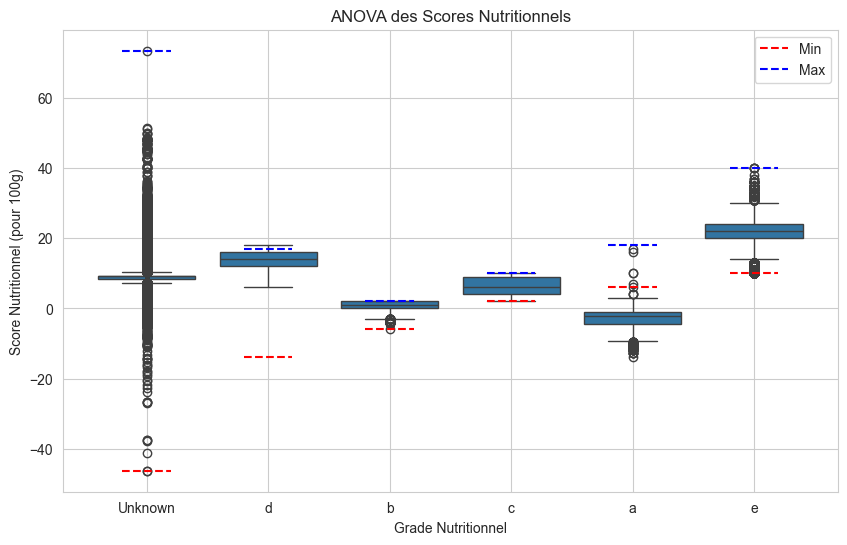

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# Supposons que df est déjà défini avec les colonnes 'nutrition_grade_fr' et 'nutrition-score-fr_100g'

# Étape 1 : Vérifier les groupes de données
groups = df.groupby('nutrition_grade_fr')['nutrition-score-fr_100g'].apply(list)

# Étape 2 : Effectuer l'ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Étape 3 : Tracer le boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='nutrition_grade_fr', y='nutrition-score-fr_100g', data=df)

# Étape 4 : Ajouter les lignes min et max pour chaque groupe
for i, group in enumerate(groups):
    min_value = np.min(group)
    max_value = np.max(group)
    plt.plot([i - 0.2, i + 0.2], [min_value, min_value], color='red', linestyle='--', label='Min' if i == 0 else "")
    plt.plot([i - 0.2, i + 0.2], [max_value, max_value], color='blue', linestyle='--', label='Max' if i == 0 else "")

# Ajouter des titres et labels
plt.title('ANOVA des Scores Nutritionnels')
plt.xlabel('Grade Nutritionnel')
plt.ylabel('Score Nutritionnel (pour 100g)')
plt.legend()
plt.grid(True)
plt.show()


28023.35475149996 0.0


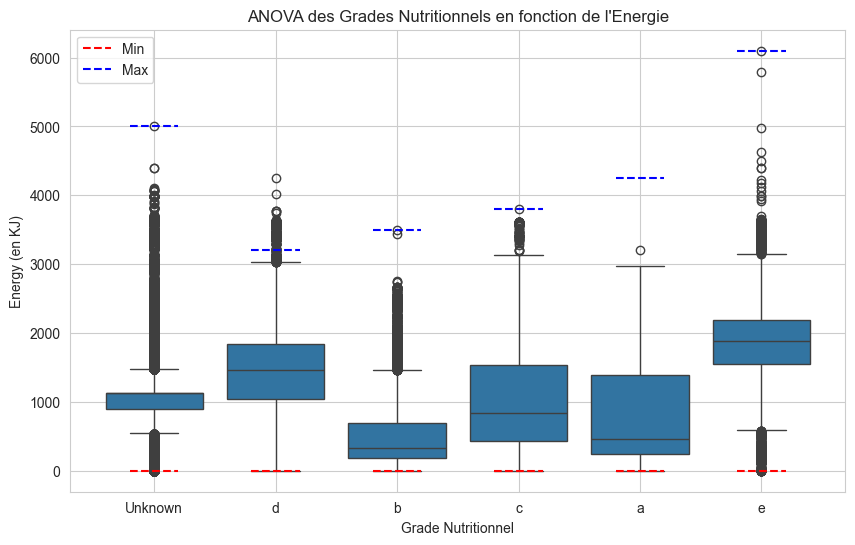

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# Supposons que df est déjà défini avec les colonnes 'nutrition_grade_fr' et 'energy_kj'

# Étape 1 : Vérifier les groupes de données
groups = df.groupby('nutrition_grade_fr')['energy_kj'].apply(list)

# Étape 2 : Effectuer l'ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f_stat, p_value)

# Étape 3 : Tracer le boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='nutrition_grade_fr', y='energy_kj', data=df)

# Étape 4 : Ajouter les lignes min et max pour chaque groupe
for i, group in enumerate(groups):
    min_value = np.min(group)
    max_value = np.max(group)
    plt.plot([i - 0.2, i + 0.2], [min_value, min_value], color='red', linestyle='--', label='Min' if i == 0 else "")
    plt.plot([i - 0.2, i + 0.2], [max_value, max_value], color='blue', linestyle='--', label='Max' if i == 0 else "")

# Ajouter des titres et labels
plt.title('ANOVA des Grades Nutritionnels en fonction de l\'Energie')
plt.xlabel('Grade Nutritionnel')
plt.ylabel('Energy (en KJ)')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
import pandas as pd
from scipy import stats

# Résultats ANOVA pour chaque colonne numérique
anova_results = {}
for col in numerical_columns:
    # Séparer les groupes selon la variable catégorielle
    groups = [df[col][df['nutrition_grade_fr'] == cat] for cat in df['nutrition_grade_fr'].unique()]
    # Appliquer l'ANOVA
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[col] = {'F-value': f_val, 'p-value': p_val}

# Afficher les résultats
anova_results


{'additives_n': {'F-value': 2344.9524915425222, 'p-value': 0.0},
 'ingredients_from_palm_oil_n': {'F-value': 791.871565918216, 'p-value': 0.0},
 'ingredients_that_may_be_from_palm_oil_n': {'F-value': 306.51160943852904,
  'p-value': 0.0},
 'energy_kj': {'F-value': 28023.354751499977, 'p-value': 0.0},
 'fat_100g': {'F-value': 18397.218612425186, 'p-value': 0.0},
 'saturated-fat_100g': {'F-value': 34942.415064758155, 'p-value': 0.0},
 'carbohydrates_100g': {'F-value': 4874.443587320363, 'p-value': 0.0},
 'sugars_100g': {'F-value': 11301.889637399332, 'p-value': 0.0},
 'fiber_100g': {'F-value': 3294.612883320819, 'p-value': 0.0},
 'proteins_100g': {'F-value': 2891.046999599353, 'p-value': 0.0},
 'salt_100g': {'F-value': 1011.5271769059926, 'p-value': 0.0},
 'sodium_100g': {'F-value': 1011.5271249254092, 'p-value': 0.0},
 'nutrition-score-fr_100g': {'F-value': 335269.5837261346, 'p-value': 0.0},
 'nutrition-score-uk_100g': {'F-value': 244228.8837463348, 'p-value': 0.0}}

| Variable                             | F-value           | p-value |
|--------------------------------------|-------------------|---------|
| additives_n                          | 2344.95           | 0.0     |
| ingredients_from_palm_oil_n         | 791.87            | 0.0     |
| ingredients_that_may_be_from_palm_oil_n | 306.51        | 0.0     |
| energy_kj                            | 28023.35          | 0.0     |
| fat_100g                             | 18397.22          | 0.0     |
| saturated-fat_100g                  | 34942.42          | 0.0     |
| carbohydrates_100g                  | 4874.44           | 0.0     |
| sugars_100g                         | 11301.89          | 0.0     |
| fiber_100g                          | 3294.61           | 0.0     |
| proteins_100g                       | 2891.05           | 0.0     |
| salt_100g                           | 1011.53           | 0.0     |
| sodium_100g                         | 1011.53           | 0.0     |
| nutrition-score-fr_100g            | 335269.58         | 0.0     |
| nutrition-score-uk_100g            | 244228.88         | 0.0     |


L'analyse de variance (ANOVA) réalisée sur les différentes variables numériques en fonction de la variable catégorielle révèle des résultats significatifs dans tous les cas examinés. Les valeurs F élevées, allant de 306.51 à 335269.58, indiquent que la variance entre les groupes est bien supérieure à la variance au sein des groupes, suggérant des différences marquées dans les moyennes des groupes pour chacune des variables.

De plus, les p-values égales à 0.0 pour toutes les variables analysées indiquent que les différences observées sont statistiquement significatives. Cela signifie que la variable catégorielle a un impact important sur chaque mesure numérique, justifiant ainsi l'importance de la prise en compte de cette variable lors de l'analyse des données.

Les variables relatives aux nutriments tels que nutrition-score-fr_100g et nutrition-score-uk_100g affichent les valeurs F les plus élevées, ce qui pourrait suggérer des disparités significatives dans la qualité nutritionnelle des produits étudiés. Les résultats mettent en évidence des différences claires dans les teneurs en additifs, graisses, sucres, et autres composants, ce qui peut avoir des implications importantes pour les décisions réglementaires, les recommandations de consommation et les stratégies de formulation des produits.

Dans l'ensemble, cette analyse souligne l'importance d'explorer les effets des facteurs catégoriels sur les caractéristiques numériques dans des études de nutrition et de santé publique.

## Interprétation des Résultats
- Comparaison des Médianes : "Nous observons que la médiane des scores nutritionnels varie significativement entre les différents grades nutritionnels."
- Variabilité des Données : "La largeur des boîtes indique la variabilité des scores. Par exemple, si la boîte du groupe 'A' est plus large que celle du groupe 'B', cela signifie que les scores sont plus dispersés dans le groupe 'A'."
- Significativité Statistique : "Les résultats de l'ANOVA montrent un p-value inférieur à 0,05, ce qui indique que les différences observées entre les groupes sont statistiquement significatives."